In [1]:
stockListFile = "StockList.xlsx"

In [2]:
import pandas as pd
import pandas_datareader.data as web
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

C:\Users\zeroc\anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


<font color="blue">Get Companies' name and symbol & map between them</font>

In [3]:
table = pd.read_excel(stockListFile)
companies = list(table['Company'][:500])
symbols = list(table['Symbol'][:500])
symbolsMapper = dict(zip(symbols,companies)) #map between company' name and it's symbol

In [4]:
symbolsMapper['MSFT']

'Microsoft Corporation'

In [5]:
len(companies)

500

### import data for each stock and calculate daily return

In [6]:
successCounter, failCounter = 0,0
start = datetime(2019,5,10)
end = datetime (2020,5,11)
dailyReturnMapper = dict() #symbol -> daily return vector
for stock in symbols:
    try:
        daily_close = web.DataReader(stock,'yahoo',start,end)['Close']
        dailyReturnMapper[stock] = daily_close.pct_change() #calculate Daily Return
        dailyReturnMapper[stock].name = 'Daily Return'
        successCounter += 1
    except:
        failCounter += 1

In [7]:
dailyReturnMapper['MSFT'] # Microsoft daily return

Date
2019-05-10         NaN
2019-05-13   -0.029733
2019-05-14    0.011188
2019-05-15    0.010342
2019-05-16    0.023092
                ...   
2020-05-05    0.010736
2020-05-06    0.009847
2020-05-07    0.005807
2020-05-08    0.005882
2020-05-11    0.011154
Name: Daily Return, Length: 253, dtype: float64

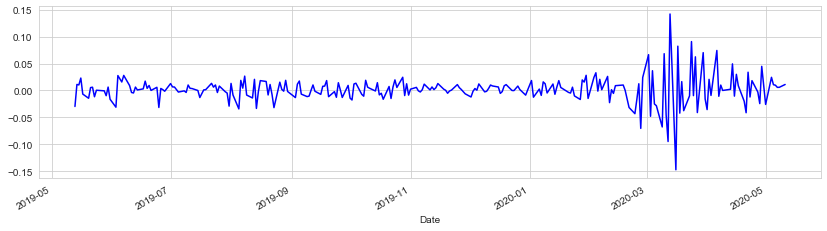

In [8]:
dailyReturnMapper['MSFT'].plot(figsize=(14,3.5),c='b')


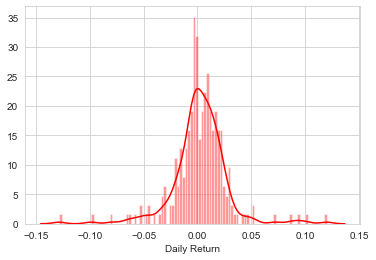

In [9]:
sns.distplot(dailyReturnMapper['AAPL'],bins=100,color='r')

### initialze dateframe that contains company's symbol and it's trading days (253)

In [10]:
columns = ['symbol']+list(dailyReturnMapper['AAPL'].index.date)
df = pd.DataFrame(columns=columns) #initialize empty table -just columns-
for symbol in dailyReturnMapper:
    try:
        df.loc[len(df)] = [symbol]+list(dailyReturnMapper[symbol])
    except: #some companies do not have all trading days data
        print(" there is not enough data for all range of dates for "+symbolsMapper[symbol]+"company")
df=df.drop(df.columns[1], axis=1, inplace=False) #drop first trading day -because this is daily return- 

 there is not enough data for all range of dates for Otis Worldwide Corporationcompany
 there is not enough data for all range of dates for Corteva Inccompany
 there is not enough data for all range of dates for Carrier Global Corp.company
 there is not enough data for all range of dates for ViacomCBS Inc. Class Bcompany
 there is not enough data for all range of dates for Howmet Aerospace Inc.company


In [11]:
df.head()

,symbol,2019-05-13,2019-05-14,2019-05-15,2019-05-16,2019-05-17,2019-05-20,2019-05-21,2019-05-22,2019-05-23,...,2020-04-28,2020-04-29,2020-04-30,2020-05-01,2020-05-04,2020-05-05,2020-05-06,2020-05-07,2020-05-08,2020-05-11
0,MSFT,-0.029733,0.011188,0.010342,0.023092,-0.006670,-0.014445,0.005387,0.006068,-0.011671,...,-0.024361,0.044874,0.010032,-0.025891,0.024460,0.010736,0.009847,0.005807,0.005882,0.011154
1,AAPL,-0.058119,0.015830,0.011979,-0.004400,-0.005682,-0.031270,0.019171,-0.020472,-0.017070,...,-0.016209,0.032845,0.021096,-0.016099,0.014149,0.015009,0.010317,0.010345,0.021038,0.015735
2,AMZN,-0.035609,0.009568,0.016863,0.019464,-0.020219,-0.005367,-0.000780,0.001163,-0.023768,...,-0.026061,0.025336,0.042690,-0.075974,0.013101,0.000782,0.014436,0.006954,0.005068,0.012351
3,FB,-0.036105,-0.004462,0.030654,0.003865,-0.009038,-0.013923,0.011493,0.002705,-0.024013,...,-0.024480,0.061670,0.054174,-0.011919,0.014782,0.008818,0.006761,0.013383,0.005160,0.003909
4,GOOGL,-0.026592,-0.010320,0.040841,0.011701,-0.013271,-0.020637,0.008544,0.001221,-0.009093,...,-0.030113,0.088910,0.003368,-0.021816,0.004236,0.019744,-0.002661,0.017727,0.010998,0.013906


# <font color="purple">Kmeans</font>

סילואט : -1 =<הסילואט <=1, אומר עד כמה דומה נתון מסוים לנתונים האחרים בקלאסטר אליו הוא משויך ועד כמה הוא שונה מהנתונים בקלאסטרים האחריםכ
ככל שהוא גדול יותר (לכיוון ה-1) זה מעיד על כך שהוא מתאים לקלאסטר , אחרת , ככל שמתקרב מ -1 זה אומר שהוא לא מתאים 

In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

for k in range(2,11):
    kmeans = KMeans(n_clusters=k,random_state=4)
    kmeans.fit(df.iloc[:,1:])
    silhoette = silhouette_score(df.iloc[:,1:],kmeans.labels_,metric='euclidean')
    print("for k = {} : silhoette score = {}".format(k,silhoette) )


for k = 2 : silhoette score = 0.1666708635329579
for k = 3 : silhoette score = 0.1259030963917839
for k = 4 : silhoette score = 0.05984710229931387
for k = 5 : silhoette score = 0.04990993296976623
for k = 6 : silhoette score = 0.07023714121413482
for k = 7 : silhoette score = 0.05021757146416703
for k = 8 : silhoette score = 0.03860418075883388
for k = 9 : silhoette score = 0.036863725720713114
for k = 10 : silhoette score = 0.04213587599704756


#### כפי שניתן לראות , עבור מס' קלאסטרים שווה ל- 2  , מתקבל ערך הסילאוט הגבוה ביותר 

# <font color="purple">Bonus : The Elbow Method</font>

נשתמש בשיטה הזו כדי לקבוע את מס' הקלסטרים הטוב ביותר , נראה אם זה עוזר לנו בבעיה שלנו

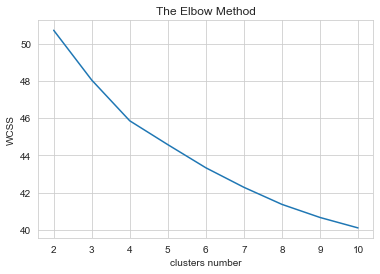

In [13]:
wcss = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k,random_state=4)
    kmeans.fit(df.iloc[:,1:])
    wcss.append(kmeans.inertia_)
    
plt.plot(range(2,11),wcss)
plt.title("The Elbow Method")
plt.xlabel("clusters number")
plt.ylabel("WCSS")
plt.show()

רואים כאן שאין מס' קלסטרים החל ממנו וימינה הקו כמעט מתיישר ולכן השיטה הזו לא עוזרת לנו ,

# <font color="blue">Hierarchical - Agglomerative Clustering</font>

נעשה את זה לפי 4 השיטות של מדידת המרחק בין קלסטרים  ,
בכל שיטה נראה קודם מה הוא מס' הקלסטרים הטוב ביותר ע"פ הצגת דנדרוגרמה מתאימה
ואז נחשב את המודל לפי ערך זה ונראה את איכות החלוקה לפי הסילואט 

In [14]:
import scipy.cluster.hierarchy as sch
sns.set_style('white')
from sklearn.cluster import AgglomerativeClustering


## 1.<font color="green">single</font>

המרחק בין שני קלסטרים נמדד לפי המרחק בין שתי הנקודות הקרובות שאחת בקלסטר הראשון והשניה בקלסטר השני

#### Using the dendrogram to find the optimal k

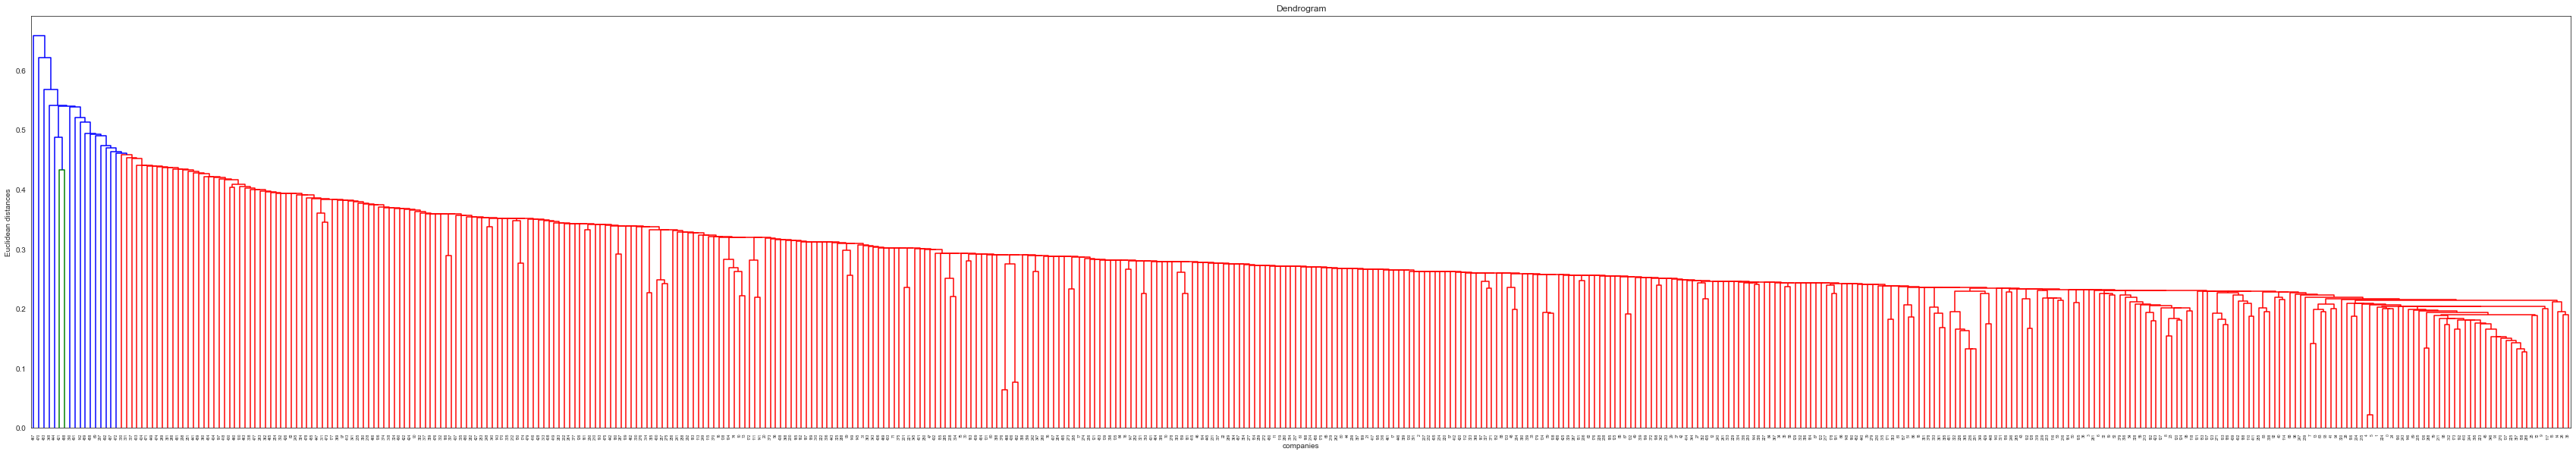

In [15]:
plt.figure(figsize=(60,10))
dendrogram = sch.dendrogram(sch.linkage(df.iloc[:,1:],method='single'))
plt.title("Dendrogram")
plt.xlabel("companies")
plt.ylabel("Euclidean distances")
plt.show()

ניתן לראות שאורך הקפיצה הגדולה ברמות מתקבלת אם נחתוך עם מס' קלסטרים 2 או 3 , ננסה את שתיהם ונראה מי יותר טוב

In [16]:
hc = AgglomerativeClustering(n_clusters=2, affinity='euclidean',linkage='single')
y_hc = hc.fit_predict(df.iloc[:,1:])
print("silhouette for k=2 : "+str(silhouette_score(df.iloc[:,1:],y_hc,metric='euclidean')))
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean',linkage='single')
y_hc = hc.fit_predict(df.iloc[:,1:])
print("silhouette for k=3 : "+str(silhouette_score(df.iloc[:,1:],y_hc,metric='euclidean')))

silhouette for k=2 : 0.5270067694330566
silhouette for k=3 : 0.40335077394044566


 kmeans קיבלנו שעבור מס' קלסטרים שווה ל-2 מקבלים ערך סילואט גדול יותר , וזו חלוקת אשכולות הרבה יותר טובה מזו של

## 2.<font color="green">complete</font>

המרחק בין שני קלסטרים נמדד לפי המרחק בין שתי הנקודות הרחוקות שאחת בקלסטר הראשון והשניה בקלסטר השני

### Using the dendrogram to find the optimal k

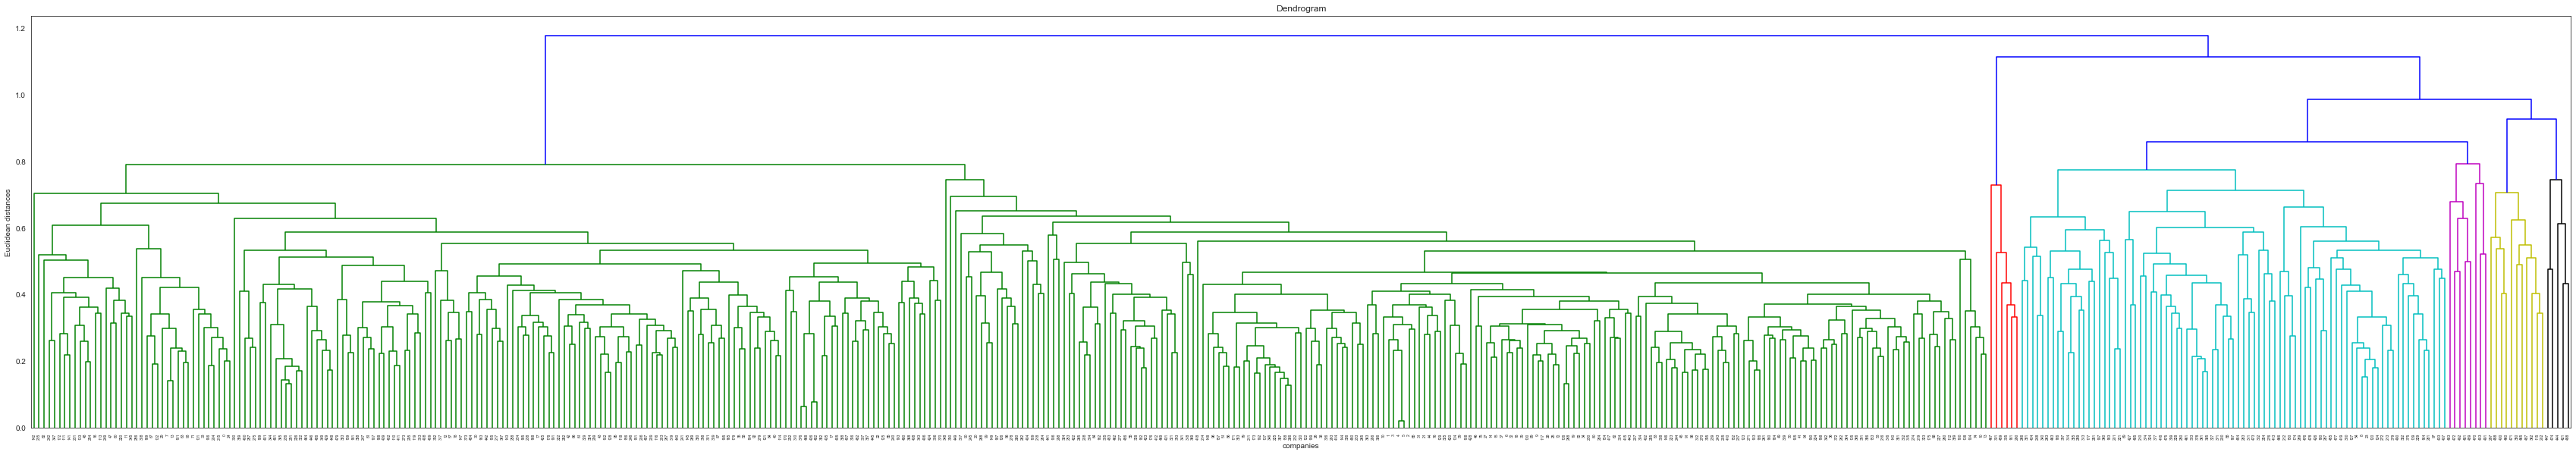

In [17]:
plt.figure(figsize=(60,10))
dendrogram = sch.dendrogram(sch.linkage(df.iloc[:,1:],method='complete'))
plt.title("Dendrogram")
plt.xlabel("companies")
plt.ylabel("Euclidean distances")
plt.show()

ניתן לראות שאורך הקפיצה הגדולה ברמות מתקבלת אם נחתוך עם מס' קלסטרים  3 

In [18]:
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean',linkage='complete')
y_hc = hc.fit_predict(df.iloc[:,1:])
print("silhouette for k=3 : "+str(silhouette_score(df.iloc[:,1:],y_hc,metric='euclidean')))

silhouette for k=3 : 0.19496499357028843


## 3.<font color="green">average</font>

המרחק בין שני קלסטרים נמדד לפי המרחק בין ממוצעי הקלסטרים

#### Using the dendrogram to find the optimal k

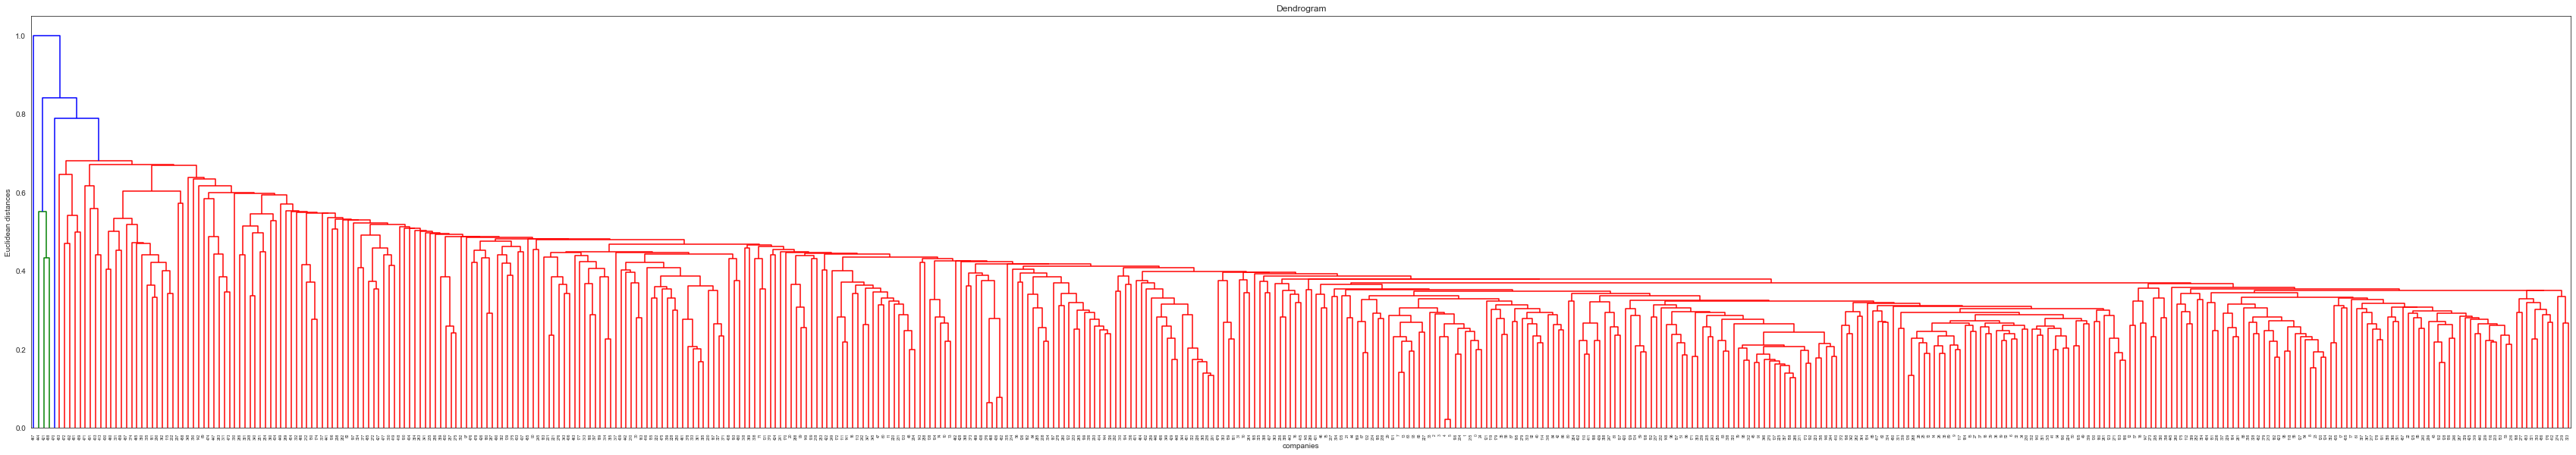

In [19]:
plt.figure(figsize=(60,10))
dendrogram = sch.dendrogram(sch.linkage(df.iloc[:,1:],method='average'))
plt.title("Dendrogram")
plt.xlabel("companies")
plt.ylabel("Euclidean distances")
plt.show()

ניתן לראות שאורך הקפיצה הגדולה ברמות מתקבלת אם נחתוך עם מס' קלסטרים  2 

In [20]:
hc = AgglomerativeClustering(n_clusters=2, affinity='euclidean',linkage='average')
y_hc = hc.fit_predict(df.iloc[:,1:])
print("silhouette for k=2 : "+str(silhouette_score(df.iloc[:,1:],y_hc,metric='euclidean')))

silhouette for k=2 : 0.5270067694330566


## 4.<font color="green">ward</font>

קריטריון השונות המינימלית של וורד ממזער את השונות הכוללת בתוך האשכול

#### Using the dendrogram to find the optimal k

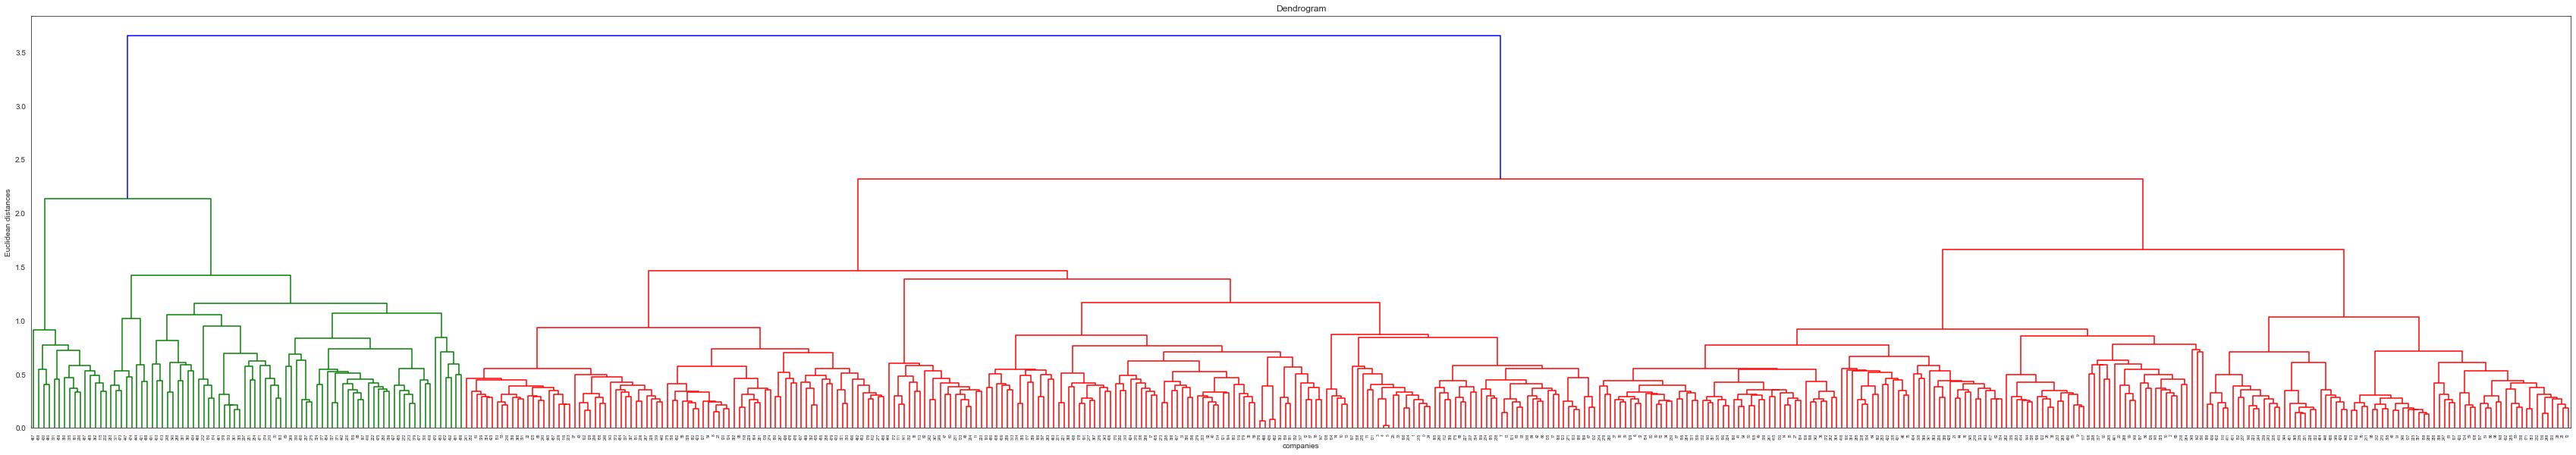

In [21]:
plt.figure(figsize=(60,10))
dendrogram = sch.dendrogram(sch.linkage(df.iloc[:,1:],method='ward'))
plt.title("Dendrogram")
plt.xlabel("companies")
plt.ylabel("Euclidean distances")
plt.show()

ניתן לראות שאורך הקפיצה הגדולה ברמות מתקבלת אם נחתוך עם מס' קלסטרים  2 

In [22]:
hc = AgglomerativeClustering(n_clusters=2, affinity='euclidean',linkage='ward')
y_hc = hc.fit_predict(df.iloc[:,1:])
print("silhouette for k=2 : "+str(silhouette_score(df.iloc[:,1:],y_hc,metric='euclidean')))

silhouette for k=2 : 0.24414788117644087


# <font color='blue'>Gaussian Mixture Model</font>

In [23]:
from sklearn.mixture import GaussianMixture 
gmm = GaussianMixture(n_components =2) 
y = gmm.fit_predict(df.iloc[:,1:])
print("GMM , silhouette for k=2 : "+str(silhouette_score(df.iloc[:,1:],y,metric='euclidean')))

GMM , silhouette for k=2 : 0.1624157641454241


# show companies stock clustring :

נראה עבור Agglomerative Clustring - ward method

In [85]:
hc = AgglomerativeClustering(n_clusters=2, affinity='euclidean',linkage='complete')
y_hc = hc.fit_predict(df.iloc[:,1:])
cluster1df = df.iloc[y_hc==0,:] #companies in cluster 0
cluster2df = df.iloc[y_hc==1,:] #companies in cluster 1

In [94]:
cluster1df

,symbol,2019-05-13,2019-05-14,2019-05-15,2019-05-16,2019-05-17,2019-05-20,2019-05-21,2019-05-22,2019-05-23,...,2020-04-28,2020-04-29,2020-04-30,2020-05-01,2020-05-04,2020-05-05,2020-05-06,2020-05-07,2020-05-08,2020-05-11
8,JPM,-0.027198,0.007949,-0.003807,0.012830,-0.004851,0.005236,0.003413,-0.008145,-0.019672,...,0.007081,0.026970,-0.021459,-0.026211,-0.011903,-0.001519,-0.018804,0.010413,0.016336,-0.029450
23,BAC,-0.044963,0.013097,-0.011530,0.010604,-0.006646,0.000000,0.010211,-0.006971,-0.025623,...,0.017895,0.037254,-0.029459,-0.040333,-0.006499,-0.011775,-0.013680,0.021924,0.031961,-0.042003
54,C,-0.051841,0.013669,-0.005976,0.017111,-0.013792,-0.001690,0.017241,-0.021489,-0.011754,...,0.013960,0.064605,-0.033824,-0.062603,-0.008787,-0.025931,-0.022753,0.039348,0.037634,-0.048575
69,BA,-0.048778,0.016807,0.007579,0.023637,0.003420,-0.006281,0.016894,-0.016641,-0.006321,...,0.020361,0.058644,0.014532,-0.054248,-0.014321,-0.046098,-0.028230,0.055720,0.037233,-0.033948
88,AXP,-0.021611,0.009577,0.005555,0.018528,-0.006425,0.006467,0.005925,-0.004479,-0.013166,...,0.036798,0.089919,-0.050666,-0.032110,-0.021966,0.004168,-0.031589,0.032500,0.031938,-0.046592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,NCLH,-0.045078,0.018267,0.007638,0.014454,-0.010947,-0.018096,0.015745,0.000705,-0.022179,...,0.144231,0.253629,-0.000609,-0.156098,0.043353,-0.225762,-0.005367,0.079137,0.035833,-0.056315
489,KSS,-0.039666,0.017081,-0.019542,-0.007007,-0.002666,-0.010849,-0.123351,-0.031006,-0.042852,...,0.066667,0.010585,-0.079302,-0.044420,-0.003968,-0.027888,-0.025176,0.075075,0.016760,-0.036264
490,IVZ,-0.071228,0.028254,0.010304,0.004371,-0.011605,0.010274,0.011138,-0.006226,-0.025542,...,0.070440,0.012926,0.000000,-0.073086,0.012516,-0.028430,-0.030534,0.006562,0.040417,-0.020050
491,ADS,-0.044768,0.017847,0.004211,0.015536,-0.014080,-0.017439,0.025994,-0.012055,-0.021577,...,0.150036,0.154202,-0.088642,-0.073697,-0.000862,-0.021580,-0.035951,0.040952,0.036923,-0.088173


In [95]:
cluster2df

,symbol,2019-05-13,2019-05-14,2019-05-15,2019-05-16,2019-05-17,2019-05-20,2019-05-21,2019-05-22,2019-05-23,...,2020-04-28,2020-04-29,2020-04-30,2020-05-01,2020-05-04,2020-05-05,2020-05-06,2020-05-07,2020-05-08,2020-05-11
0,MSFT,-0.029733,0.011188,0.010342,0.023092,-0.006670,-0.014445,0.005387,0.006068,-0.011671,...,-0.024361,0.044874,0.010032,-0.025891,0.024460,0.010736,0.009847,0.005807,0.005882,0.011154
1,AAPL,-0.058119,0.015830,0.011979,-0.004400,-0.005682,-0.031270,0.019171,-0.020472,-0.017070,...,-0.016209,0.032845,0.021096,-0.016099,0.014149,0.015009,0.010317,0.010345,0.021038,0.015735
2,AMZN,-0.035609,0.009568,0.016863,0.019464,-0.020219,-0.005367,-0.000780,0.001163,-0.023768,...,-0.026061,0.025336,0.042690,-0.075974,0.013101,0.000782,0.014436,0.006954,0.005068,0.012351
3,FB,-0.036105,-0.004462,0.030654,0.003865,-0.009038,-0.013923,0.011493,0.002705,-0.024013,...,-0.024480,0.061670,0.054174,-0.011919,0.014782,0.008818,0.006761,0.013383,0.005160,0.003909
4,GOOGL,-0.026592,-0.010320,0.040841,0.011701,-0.013271,-0.020637,0.008544,0.001221,-0.009093,...,-0.030113,0.088910,0.003368,-0.021816,0.004236,0.019744,-0.002661,0.017727,0.010998,0.013906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,HRB,-0.000736,-0.001104,0.009580,0.001460,-0.015306,-0.001480,0.013343,-0.013899,0.009644,...,0.061074,0.061354,-0.007747,-0.035435,0.027397,-0.038788,-0.020177,0.003861,0.039744,-0.009864
480,XRX,-0.032578,0.008339,0.017176,0.015322,-0.005236,-0.005573,0.024595,-0.032209,0.000942,...,-0.004489,0.087373,-0.051840,-0.068890,-0.012331,0.012485,-0.019378,0.037724,0.046163,-0.030336
482,DISCA,-0.039353,0.014631,0.000360,0.004685,-0.000359,-0.020093,0.025632,-0.021064,-0.006565,...,0.029451,0.055935,-0.093409,-0.033452,0.009229,-0.028349,-0.018824,-0.015348,0.027277,-0.036036
484,FLS,-0.033367,0.022042,0.012614,0.027728,-0.032649,0.002425,0.020766,-0.015208,-0.023466,...,0.021402,0.070809,-0.049595,-0.057508,0.012806,0.013016,-0.021659,0.029268,-0.023697,-0.066094


# <font color="purple">e סעיף </font> 

 Agglomerative Clustring - complete method אבחר 

In [96]:
#calculate dailyReturn average for each cluster separately  , for all trading days
cluster1_dailyReturn_avg = pd.DataFrame(columns=cluster1df.columns[1:]) #init
dailyReturn = [] # to keep daily return average , for all trading days
for i in range(1,len(cluster1df.columns)):
    dailyReturn.append(cluster1df[cluster1df.columns[i]].mean())
cluster1_dailyReturn_avg.loc[0] = dailyReturn #add it as row 
cluster1_dailyReturn_avg

,2019-05-13,2019-05-14,2019-05-15,2019-05-16,2019-05-17,2019-05-20,2019-05-21,2019-05-22,2019-05-23,2019-05-24,...,2020-04-28,2020-04-29,2020-04-30,2020-05-01,2020-05-04,2020-05-05,2020-05-06,2020-05-07,2020-05-08,2020-05-11
0,-0.032821,0.014638,0.000658,0.008241,-0.012158,-0.004888,0.012021,-0.013864,-0.023092,0.002875,...,0.041127,0.073518,-0.037207,-0.057561,0.001291,-0.014952,-0.029098,0.029976,0.047843,-0.032765


In [97]:
#for cluster 2:
cluster2_dailyReturn_avg = pd.DataFrame(columns=cluster2df.columns[1:]) #init
dailyReturn = [] # to keep daily return average , for all trading days
for i in range(1,len(cluster2df.columns)):
    dailyReturn.append(cluster2df[cluster2df.columns[i]].mean())
cluster2_dailyReturn_avg.loc[0] = dailyReturn #add it as row 
cluster2_dailyReturn_avg

,2019-05-13,2019-05-14,2019-05-15,2019-05-16,2019-05-17,2019-05-20,2019-05-21,2019-05-22,2019-05-23,2019-05-24,...,2020-04-28,2020-04-29,2020-04-30,2020-05-01,2020-05-04,2020-05-05,2020-05-06,2020-05-07,2020-05-08,2020-05-11
0,-0.022039,0.007785,0.00379,0.006442,-0.005615,-0.006847,0.010432,-0.002169,-0.009641,0.001777,...,0.004388,0.021272,-0.020281,-0.027668,0.000996,0.011067,-0.009536,0.012819,0.020503,-0.003936


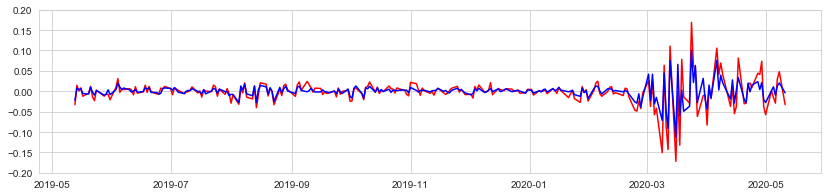

In [98]:
#plot cluster 1 , cluster 2 , daily return average:
sns.set_style('whitegrid')
plt.ylim(-0.2, 0.2)
cluster1_dailyReturn_avg.iloc[0].plot(figsize=(14,5),c='red')
cluster2_dailyReturn_avg.iloc[0].plot(figsize=(14,3),c='blue')

רואים שהקלאסטר הראשון , שזה הצבע הכחול , זה קלאסטר של החברות שהיו יציבות מתחילת השנה,  ונשארו יציבות ואפילו עלו בתקופת הקורונה 
לעומת זאת ,בקלאסטר השני,האדום , רואים שזה קלאסטר שמכיל חברות שלא היו כל כך יציבות במהלך השנה,  ונפלו חזק בתקופת הקורונה

### עכשיו נקלסטר שוב , אבל הפעם רק נתמקד בימי המסחר בתקופת הקורונה , אולי ניתן לזהות מגמות יותר טוב בתקופה זו 

In [100]:
coronaDf = df.iloc[:,200:] #from 21/2 to 11/5
coronaDf.insert(0, 'symbol', df['symbol'])
hc_corona = AgglomerativeClustering(n_clusters=2, affinity='euclidean',linkage='complete')
y_corona = hc_corona.fit_predict(coronaDf.iloc[:,1:])
cluster1dfcorona = coronaDf.iloc[y_corona==0,:] #companies in cluster 0
cluster2dfcorona = coronaDf.iloc[y_corona==1,:] #companies in cluster 1

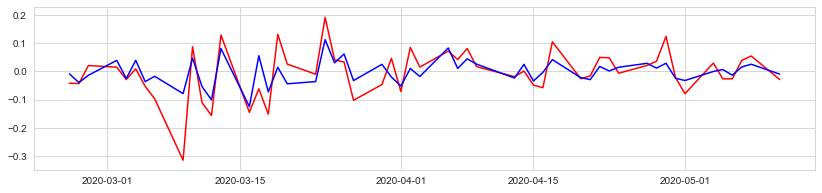

In [101]:
cluster1_dailyReturn_avg = pd.DataFrame(columns=cluster1dfcorona.columns[1:]) #init
dailyReturn = [] # to keep daily return average , for all trading days
for i in range(1,len(cluster1dfcorona.columns)):
    dailyReturn.append(cluster1dfcorona[cluster1dfcorona.columns[i]].mean())
cluster1_dailyReturn_avg.loc[0] = dailyReturn #add it as row 
cluster1_dailyReturn_avg

cluster2_dailyReturn_avg = pd.DataFrame(columns=cluster2dfcorona.columns[1:]) #init
dailyReturn = [] # to keep daily return average , for all trading days
for i in range(1,len(cluster2dfcorona.columns)):
    dailyReturn.append(cluster2dfcorona[cluster2dfcorona.columns[i]].mean())
cluster2_dailyReturn_avg.loc[0] = dailyReturn #add it as row 
cluster2_dailyReturn_avg

sns.set_style('whitegrid')
plt.ylim(-0.35, 0.23)
cluster1_dailyReturn_avg.iloc[0].plot(figsize=(14,5),c='red')
cluster2_dailyReturn_avg.iloc[0].plot(figsize=(14,3),c='blue')


נדפיס את החברות שנמצאות בקלאסטר האדום , שסבלו הכי הרבה בתחילת הקורונה

In [102]:
for s in cluster1dfcorona['symbol'] :
    print(symbolsMapper[s])

ConocoPhillips
EOG Resources Inc.
Schlumberger NV
Williams Companies Inc.
Pioneer Natural Resources Company
ONEOK Inc.
Occidental Petroleum Corporation
Hess Corporation
Concho Resources Inc.
Halliburton Company
Baker Hughes Company Class A
Royal Caribbean Cruises Ltd.
Diamondback Energy Inc.
Carnival Corporation
Noble Energy Inc.
Marathon Oil Corporation
Devon Energy Corporation
National Oilwell Varco Inc.
Apache Corporation
Mosaic Company
TechnipFMC Plc
Norwegian Cruise Line Holdings Ltd.


רואים כאן במיוחד חברות נפט , גז, חברות תעופה 

# <font color="red"> f סעיף</font>  

###  pick random 50 stocks


In [457]:
df50 = df.sample(n = 50, random_state=920)
data = df50.iloc[:,1:]
df50.head()

,symbol,2019-05-13,2019-05-14,2019-05-15,2019-05-16,2019-05-17,2019-05-20,2019-05-21,2019-05-22,2019-05-23,...,2020-04-28,2020-04-29,2020-04-30,2020-05-01,2020-05-04,2020-05-05,2020-05-06,2020-05-07,2020-05-08,2020-05-11
487,FTI,-0.034604,0.025862,0.008403,0.007456,-0.022203,0.022707,0.023944,-0.022959,-0.036554,...,0.036458,0.164573,-0.038835,-0.071829,-0.037485,-0.025126,-0.039949,0.016107,0.046235,-0.053030
181,AZO,-0.018019,0.007368,-0.011558,0.003046,0.002802,-0.006361,0.055654,0.011315,-0.008727,...,-0.004781,-0.001232,-0.032092,-0.025355,0.015576,0.013090,0.008992,-0.019567,0.045191,-0.003800
137,AEP,0.019844,-0.009034,-0.005961,0.004115,0.005269,0.008736,0.000115,0.007851,0.010196,...,0.012078,-0.017724,-0.000241,-0.020695,0.020396,0.003131,-0.053895,-0.002791,0.016031,-0.008640
491,ADS,-0.044768,0.017847,0.004211,0.015536,-0.014080,-0.017439,0.025994,-0.012055,-0.021577,...,0.150036,0.154202,-0.088642,-0.073697,-0.000862,-0.021580,-0.035951,0.040952,0.036923,-0.088173
120,USB,-0.026069,0.004723,-0.005093,0.013979,0.001165,0.003103,0.003480,-0.000963,-0.013115,...,0.021460,0.049386,-0.050962,-0.042740,-0.013452,-0.026980,-0.009839,0.029810,0.016082,-0.040288


### PCA after clustring,,,

In [447]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(data)

In [448]:
pca.explained_variance_ratio_

array([0.23838192, 0.10148071])

השונות המצטברת משני הרכיבים :

In [449]:
sum(pca.explained_variance_ratio_)

0.33986263238986747

לא רע..

In [450]:
reduced_data = pca.transform(data)
reduced_data = pd.DataFrame(reduced_data,columns=['Dimension 1', 'Dimension 2'])
reduced_data.head()

,Dimension 1,Dimension 2
0,0.229954,0.250104
1,-0.094436,0.019708
2,-0.213893,-0.073042
3,0.463539,0.282567
4,0.051258,-0.103601


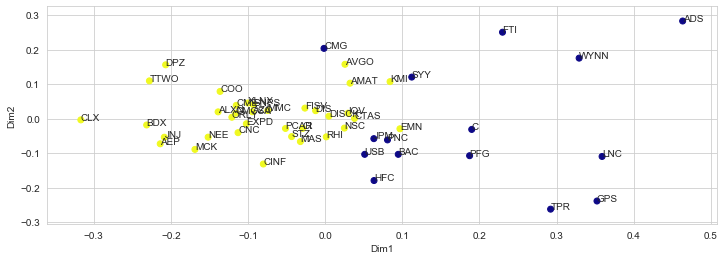

In [451]:
plt.figure(figsize=(12,4))
plt.xlabel('Dim1')
plt.ylabel('Dim2')
cluster_result = y_hc[data.index]
plt.scatter(reduced_data.iloc[:,0],reduced_data.iloc[:,1],c=cluster_result,cmap='plasma')
n = df50['symbol']
for i, txt in enumerate(n):
    plt.annotate(txt, (reduced_data.iloc[i,0], reduced_data.iloc[i,1]))

נשים לב שכמעט ניתן להבחין בין שני הקלאסטרים

# <font color="red">g. PCA <b>before clustring </b></font> 


In [452]:
ac_pca = AgglomerativeClustering(n_clusters=2, affinity='euclidean',linkage='complete')
y_pca = ac_pca.fit_predict(reduced_data)
y_pca

array([0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1], dtype=int64)

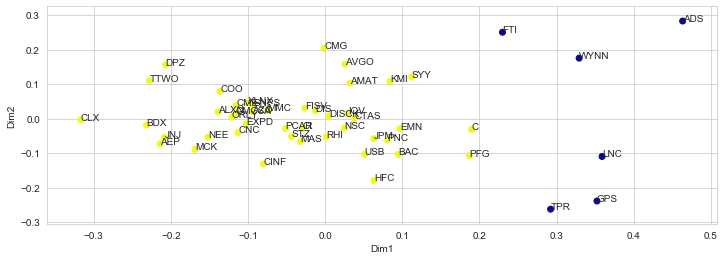

In [456]:
plt.figure(figsize=(12,4))
plt.xlabel('Dim1')
plt.ylabel('Dim2')
plt.scatter(reduced_data.iloc[:,0],reduced_data.iloc[:,1],c=y_pca,cmap='plasma')
n = df50['symbol']
for i, txt in enumerate(n):
    plt.annotate(s=txt, xy=(reduced_data.iloc[i,0], reduced_data.iloc[i,1]))

כאן מבחינים בין הקלאסטרים יותר טוב